Tentative de stats descriptives sympa !

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [51]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

,Unnamed: 0,Nom,Etat,Code_Etat,id_Etat,id_county,fips,geometry,unemp_rate_year_2013,unemp_rate_year_2014,...,bachelors_deg_year_2018,score_legis,bchecks_2013,bchecks_2014,bchecks_2015,bchecks_2016,bchecks_2017,bchecks_2018,per_dem,per_gop
856,856,Madison,Iowa,IA,27297,28195,19121.0,"POLYGON ((4984 7113, 4962 7111, 4939 7111, 491...",4.5,4.3,...,23.9,3.10,160062,127022,147309,202277,160981,189159,0.312801,0.626071
2763,2763,Val Verde,Texas,TX,27326,30131,48465.0,"POLYGON ((3241 4321, 3357 4314, 3422 4310, 343...",6.1,5.0,...,18.6,2.45,1633278,1465992,1574266,1721726,1549434,1571632,0.513505,0.434550
2268,2268,Clinton,Pennsylvania,PA,27320,29631,42035.0,"POLYGON ((8053 7453, 8047 7457, 8039 7467, 805...",8.3,7.0,...,19.0,4.00,1044731,899241,993429,1143220,1062651,1021943,0.305479,0.653750
2764,2764,Van Zandt,Texas,TX,27326,30132,48467.0,"POLYGON ((4533 4946, 4536 4946, 4564 4945, 458...",5.9,4.2,...,17.1,2.45,1633278,1465992,1574266,1721726,1549434,1571632,0.128729,0.850016
2798,2798,Millard,Utah,UT,27328,30168,49027.0,"POLYGON ((898 6800, 900 6813, 903 6826, 946 70...",3.3,3.3,...,22.4,2.00,324604,263812,254814,294907,270477,295858,0.082346,0.737486


In [87]:
gun_violence_db = pd.read_csv('data/gun_violence_db.csv')
gun_violence_db.sample(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
205368,930398,2017-08-25,California,Stockton,4500 block of N Pershing Ave,0,0,http://www.gunviolencearchive.org/incident/930398,https://www.tipsoftonline.com/Push/uploads/572...,False,...,"{0: '28', 1: '26'}","{0: 'Adult 18+', 1: 'Adult 18+'}","{0: 'Male', 1: 'Male'}","{0: 'Maurice Banks', 1: 'Derek Price'}",NaN,"{0: 'Unharmed, Arrested', 1: 'Unharmed, Arrest...","{0: 'Subject-Suspect', 1: 'Subject-Suspect'}",https://www.tipsoftonline.com/Push/uploads/572...,13.0,5.0
28772,172838,2014-07-29,Florida,Ocala,1800 block of Northeast 30th Street,0,0,http://www.gunviolencearchive.org/incident/172838,http://www.ocala.com/article/20140730/ARTICLES...,False,...,NaN,{0: 'Adult 18+'},{0: 'Female'},NaN,NaN,{0: 'Unharmed'},"{0: 'Victim', 1: 'Subject-Suspect'}",http://www.wcjb.com/local-news/2014/07/two-ear...,23.0,8.0
146763,658199,2016-09-16,Maryland,Baltimore,300 block of East 22nd Street,0,1,http://www.gunviolencearchive.org/incident/658199,http://www.carrollcountytimes.com/bs-md-ci-cri...,False,...,NaN,{0: 'Adult 18+'},{0: 'Male'},NaN,NaN,{0: 'Injured'},{0: 'Victim'},http://www.carrollcountytimes.com/bs-md-ci-cri...,43.0,43.0
224626,1012898,2017-12-22,Pennsylvania,Harrisburg,17th St and Mulberry St,1,1,http://www.gunviolencearchive.org/incident/101...,http://www.pennlive.com/news/2017/12/el-mofty_...,False,...,{1: '51'},"{0: 'Adult 18+', 1: 'Adult 18+'}","{0: 'Female', 1: 'Male'}","{0: 'Officer', 1: 'Ahmed Aminamin El-Mofty'}",NaN,"{0: 'Injured', 1: 'Killed'}","{0: 'Victim', 1: 'Subject-Suspect'}",http://www.masslive.com/news/index.ssf/2017/12...,NaN,NaN
137988,617101,2016-07-29,California,Emeryville,Watts Street and Park Avenue,0,0,http://www.gunviolencearchive.org/incident/617101,http://www.eastbaytimes.com/breaking-news/ci_3...,False,...,NaN,NaN,NaN,"{0: 'Officer', 1: 'Officer'}",NaN,"{0: 'Unharmed', 1: 'Unharmed'}","{0: 'Victim', 1: 'Victim'}",http://www.eastbaytimes.com/breaking-news/ci_3...,15.0,9.0


Puis fusion des deux bases sur les données géographiques

In [88]:
#Conversion to geopandas
from shapely import wkt

def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None

total_db['geometry'] = total_db['geometry'].apply(wkt_loads)
total_db_geo = gpd.GeoDataFrame(data=total_db, geometry=total_db['geometry'], crs=CRS.from_wkt(custom_crs_wkt))

In [92]:
incident_geom = [Point(xy) for xy in zip(gun_violence_db['latitude'], gun_violence_db['longitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=incident_geom)
gun_violence_geo.set_crs('EPSG:4326')

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,geometry
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}",{0: 'Julian Sims'},NaN,"{0: 'Arrested', 1: 'Injured', 2: 'Injured', 3:...","{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Vi...",http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,POINT (40.34670 -79.85590)
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...",{0: 'Male'},{0: 'Bernard Gillis'},NaN,"{0: 'Killed', 1: 'Injured', 2: 'Injured', 3: '...","{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Vi...",http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,POINT (33.90900 -118.33300)
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Male', 1: 'Male', 2: 'Male', 3: 'Male', 4...","{0: 'Damien Bell', 1: 'Desmen Noble', 2: 'Herm...",NaN,"{0: 'Injured, Unharmed, Arrested', 1: 'Unharme...","{0: 'Subject-Suspect', 1: 'Subject-Suspect', 2...",http://www.morningjournal.com/general-news/201...,56.0,13.0,POINT (41.44550 -82.13770)
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...","{0: 'Female', 1: 'Male', 2: 'Male', 3: 'Male'}","{0: 'Stacie Philbrook', 1: 'Christopher Ratlif...",NaN,"{0: 'Killed', 1: 'Killed', 2: 'Killed', 3: 'Ki...","{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Su...",http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,POINT (39.65180 -104.80200)
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,"{0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-1...","{0: 'Female', 1: 'Male', 2: 'Male', 3: 'Female'}","{0: 'Danielle Imani Jameison', 1: 'Maurice Eug...",{3: 'Family'},"{0: 'Injured', 1: 'Injured', 2: 'Killed', 3: '...","{0: 'Victim', 1: 'Victim', 2: 'Victim', 3: 'Su...",http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,POINT (36.11400 -79.95690)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,{0: 'Adult 18+'},{0: 'Female'},{0: 'Jhkeya Tezeno'},NaN,"{0: 'Unharmed, Arrested'}",{0: 'Subject-Suspect'},http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN,POINT EMPTY
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,"{0: 'Adult 18+', 1: 'Adult 18+'}","{0: 'Male', 1: 'Male'}","{0: 'Jamal Haskett', 1: 'Jaquarious Tyjuan Ard...",NaN,"{0: 'Killed', 1: 'Unharmed, Arrested'}","{0: 'Victim', 1: 'Subject-Suspect'}",http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,POINT (31.75370 -93.08360)
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,{0: 'Adult 18+'},{0: 'Ma

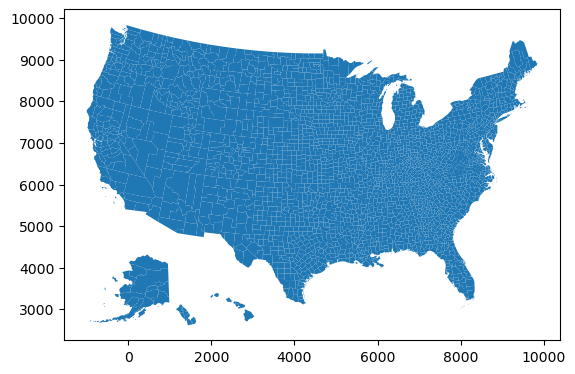

In [73]:
f, ax = plt.subplots()
total_db_geo.plot(ax=ax, aspect=1)
plt.show()

In [19]:
from pyproj import Proj, transform, Transformer
# Define the default CRS Proj4 string
# Define parameters from the "default" section in your GeoJSON
proj4_string = (
    "+proj=lcc +lat_1=33 +lat_2=45 +lat_0=39 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"
)
scale = 0.000151599359356
jsonres = 15.5
jsonmarginX = -999
jsonmarginY = 9851
xoffset = -2361356.09818
yoffset = 1406281.44289

In [46]:
import pyproj
from shapely.geometry import shape, Point
import json

# Define the custom CRS parameters
custom_crs_proj4 = (
    "+proj=lcc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs +type=crs"
)
custom_crs = pyproj.CRS.from_proj4(custom_crs_proj4)

# Define the EPSG:4326 CRS
custom_crs = pyproj.CRS("ESRI:102004")
wgs84_crs = pyproj.CRS("EPSG:4326")

# Create a transformer from EPSG:4326 to the custom CRS
transformer = pyproj.Transformer.from_crs(wgs84_crs, custom_crs, always_xy=True)

# Custom scaling factor
scaling_factor = 0.000151599359356

# Additional parameters
jsonres = 15.5
jsonmarginX = -999
jsonmarginY = 9851
xoffset = -2361356.09818
yoffset = 1406281.44289

# Sample coordinates in EPSG:4326 (longitude, latitude)
lon, lat = -80,40

# Transform the coordinates
x, y = transformer.transform(lon, lat)


# Apply additional parameters
x_final = (x+xoffset)*scaling_factor + jsonmarginX
y_final = (y-yoffset)*scaling_factor + jsonmarginY

print("Original Coordinates (EPSG:4326):", lon, lat)
print(x,y)
print("Transformed Coordinates (Custom CRS):", x_final, y_final)


Original Coordinates (EPSG:4326): -80 40
1352003.060689368 229753.75259534785
Transformed Coordinates (Custom CRS): -1152.0172738476124 9672.639155886736


204.96279784785938